In [11]:
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [13]:
arabian_text = pd.read_csv('ner-results-arabian.csv')
chinese_text = pd.read_csv('ner-results-chinese.csv')
english_text = pd.read_csv('ner-results-english.csv')
german_text = pd.read_csv('ner-results-german.csv')
indian_text = pd.read_csv('ner-results-indian.csv')
russian_text = pd.read_csv('ner-results-russian.csv')

FileNotFoundError: ignored

In [ ]:
arabian_text.head()

,Unnamed: 0,Score,Type,Text,BeginOffset,EndOffset
0,0,0.875240,PERSON,King,0,4
1,1,0.620019,PERSON,Sindibad,5,13
2,2,0.909396,PERSON,Allah,47,52
3,3,0.835860,OTHER,FN#86,69,74
4,4,0.754380,OTHER,FN#87,714,719


We explore the range in Comprehend's confidence in recognizing entities. This is done by comparing the distribution of confidence scores per set of stories:

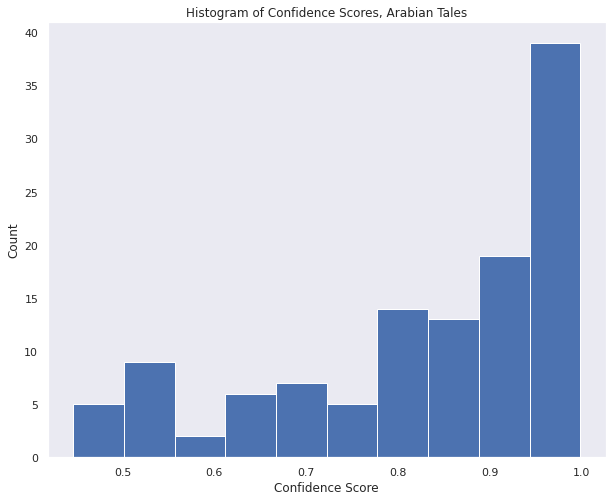

In [ ]:
plt.subplot()
arabian_text['Score'].hist(grid = False)
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Histogram of Confidence Scores, Arabian Tales');

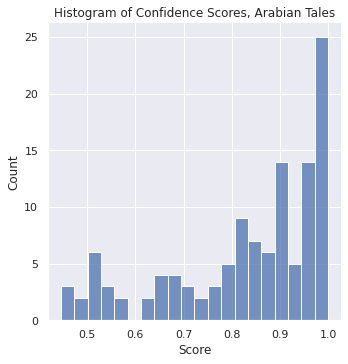

In [ ]:
sns.displot(arabian_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, Arabian Tales')

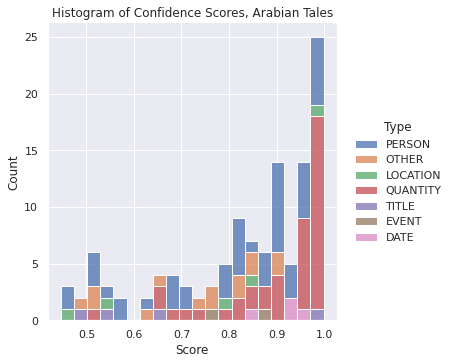

In [ ]:
sns.displot(arabian_text, x="Score", bins=20, hue="Type", multiple="stack").set(title='Histogram of Confidence Scores, Arabian Tales')

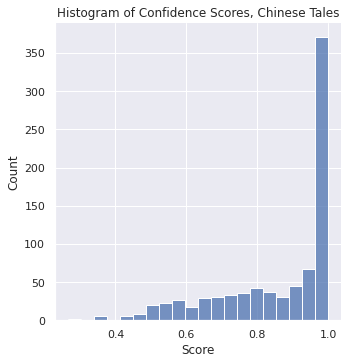

In [ ]:
sns.displot(chinese_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, Chinese Tales')

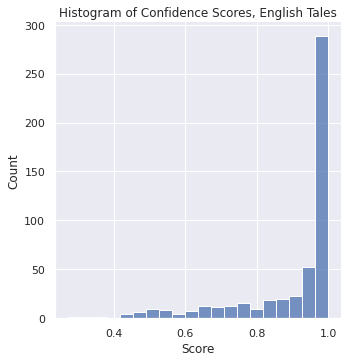

In [ ]:
sns.displot(english_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, English Tales')

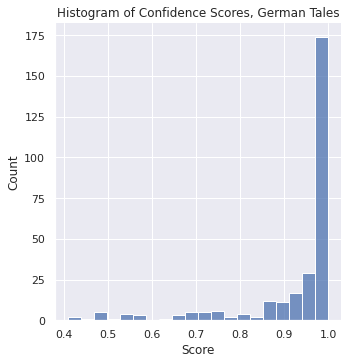

In [ ]:
sns.displot(german_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, German Tales')

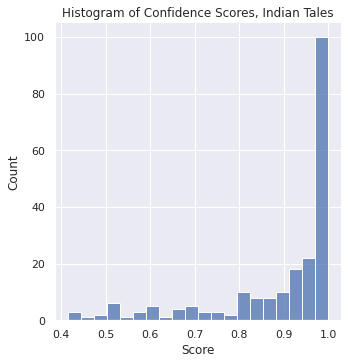

In [ ]:
sns.displot(indian_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, Indian Tales')

[Text(0.5, 1.0, 'Histogram of Confidence Scores, Russian Tales')]

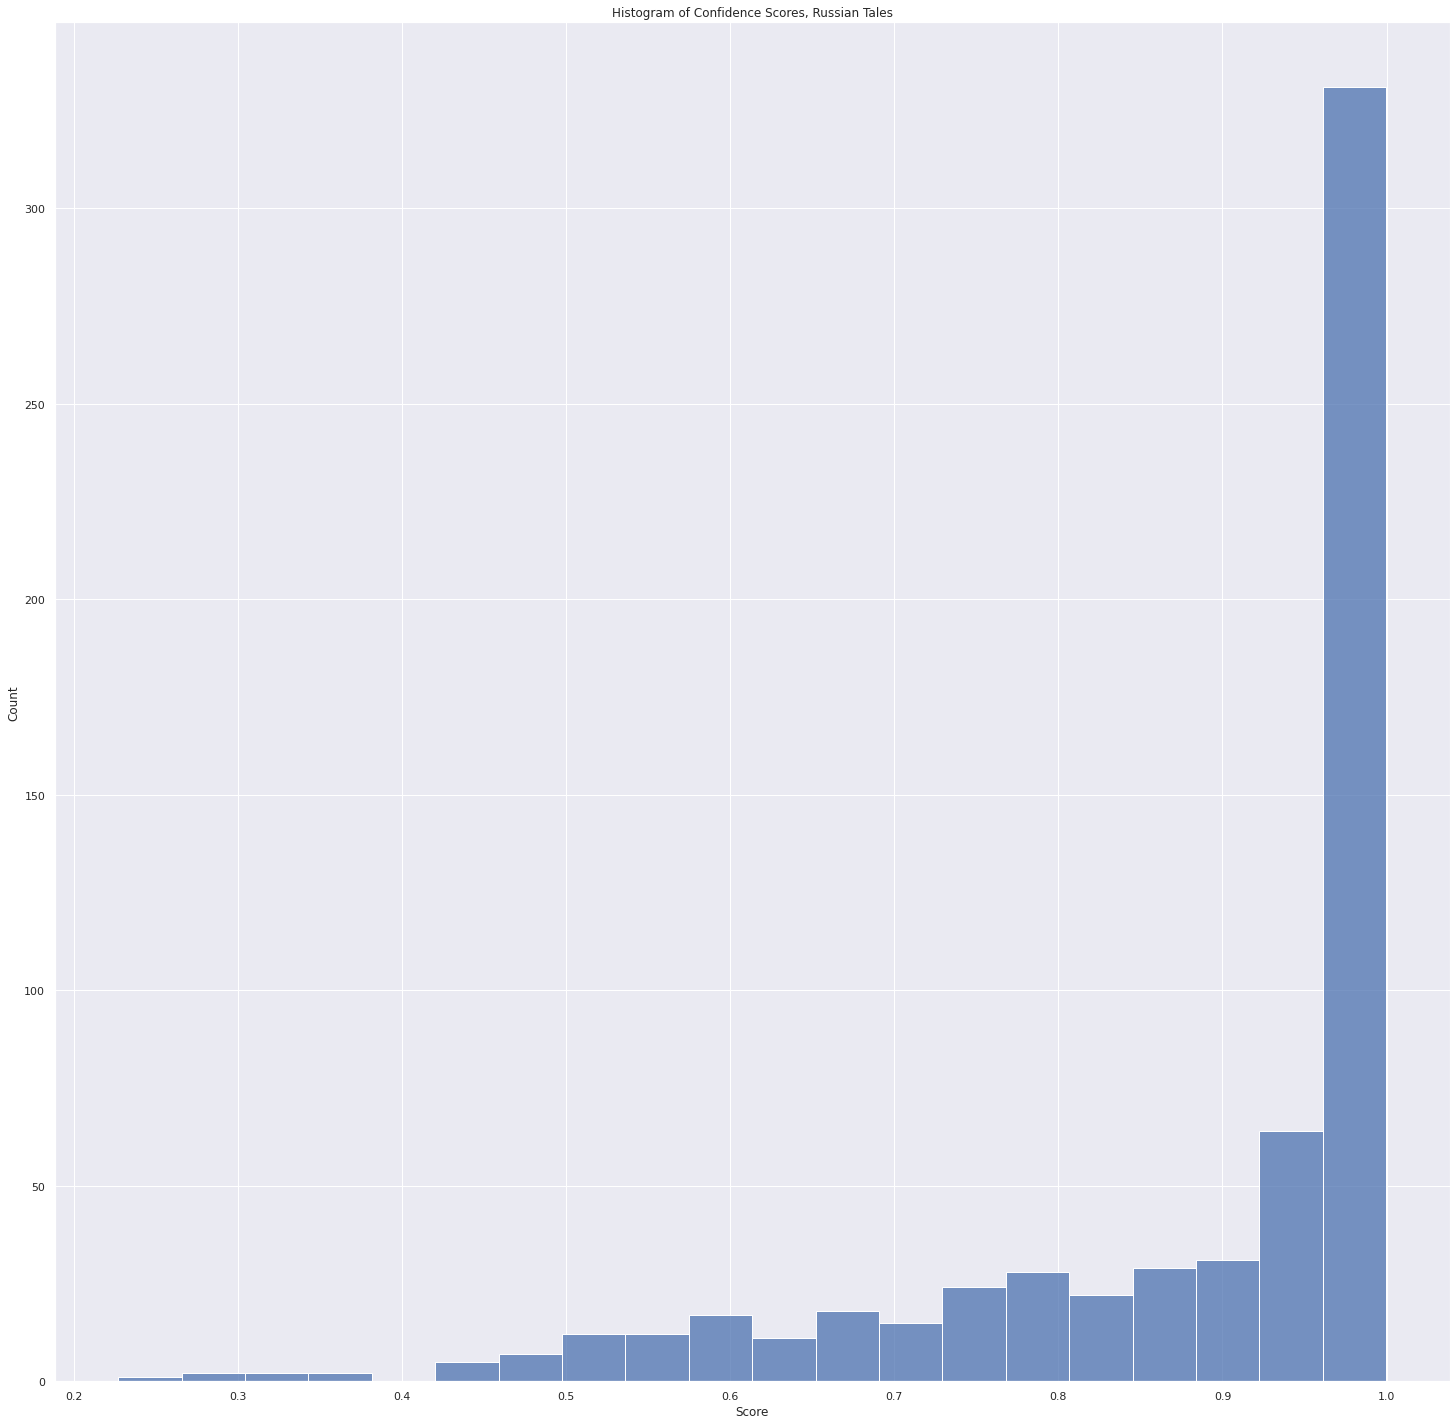

In [ ]:
sns.histplot(russian_text, x="Score", bins=20).set(title='Histogram of Confidence Scores, Russian Tales')

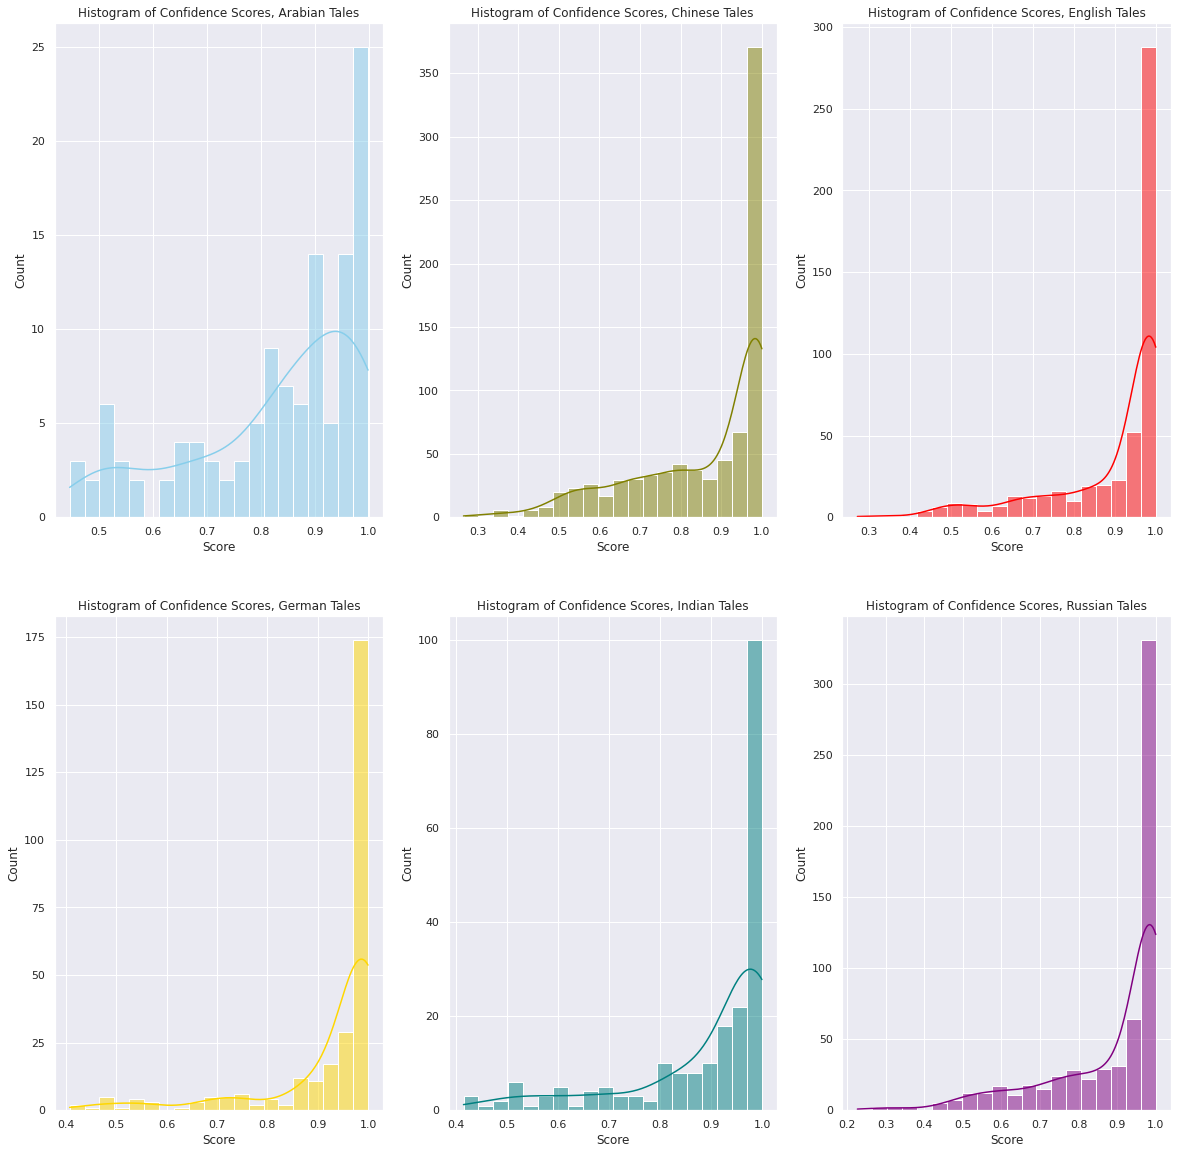

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 20))

sns.histplot(data=arabian_text, x="Score", kde=True, bins=20, color="skyblue", ax=axs[0, 0]).set(title='Histogram of Confidence Scores, Arabian Tales')
sns.histplot(data=chinese_text, x="Score", kde=True, bins=20, color="olive", ax=axs[0, 1]).set(title='Histogram of Confidence Scores, Chinese Tales')
sns.histplot(data=english_text, x="Score", kde=True, bins=20, color="red", ax=axs[0, 2]).set(title='Histogram of Confidence Scores, English Tales')
sns.histplot(data=german_text, x="Score", kde=True, bins=20, color="gold", ax=axs[1, 0]).set(title='Histogram of Confidence Scores, German Tales')
sns.histplot(data=indian_text, x="Score", kde=True, bins=20, color="teal", ax=axs[1, 1]).set(title='Histogram of Confidence Scores, Indian Tales')
sns.histplot(data=russian_text, x="Score", kde=True, bins=20, color="purple", ax=axs[1, 2]).set(title='Histogram of Confidence Scores, Russian Tales')

plt.show()

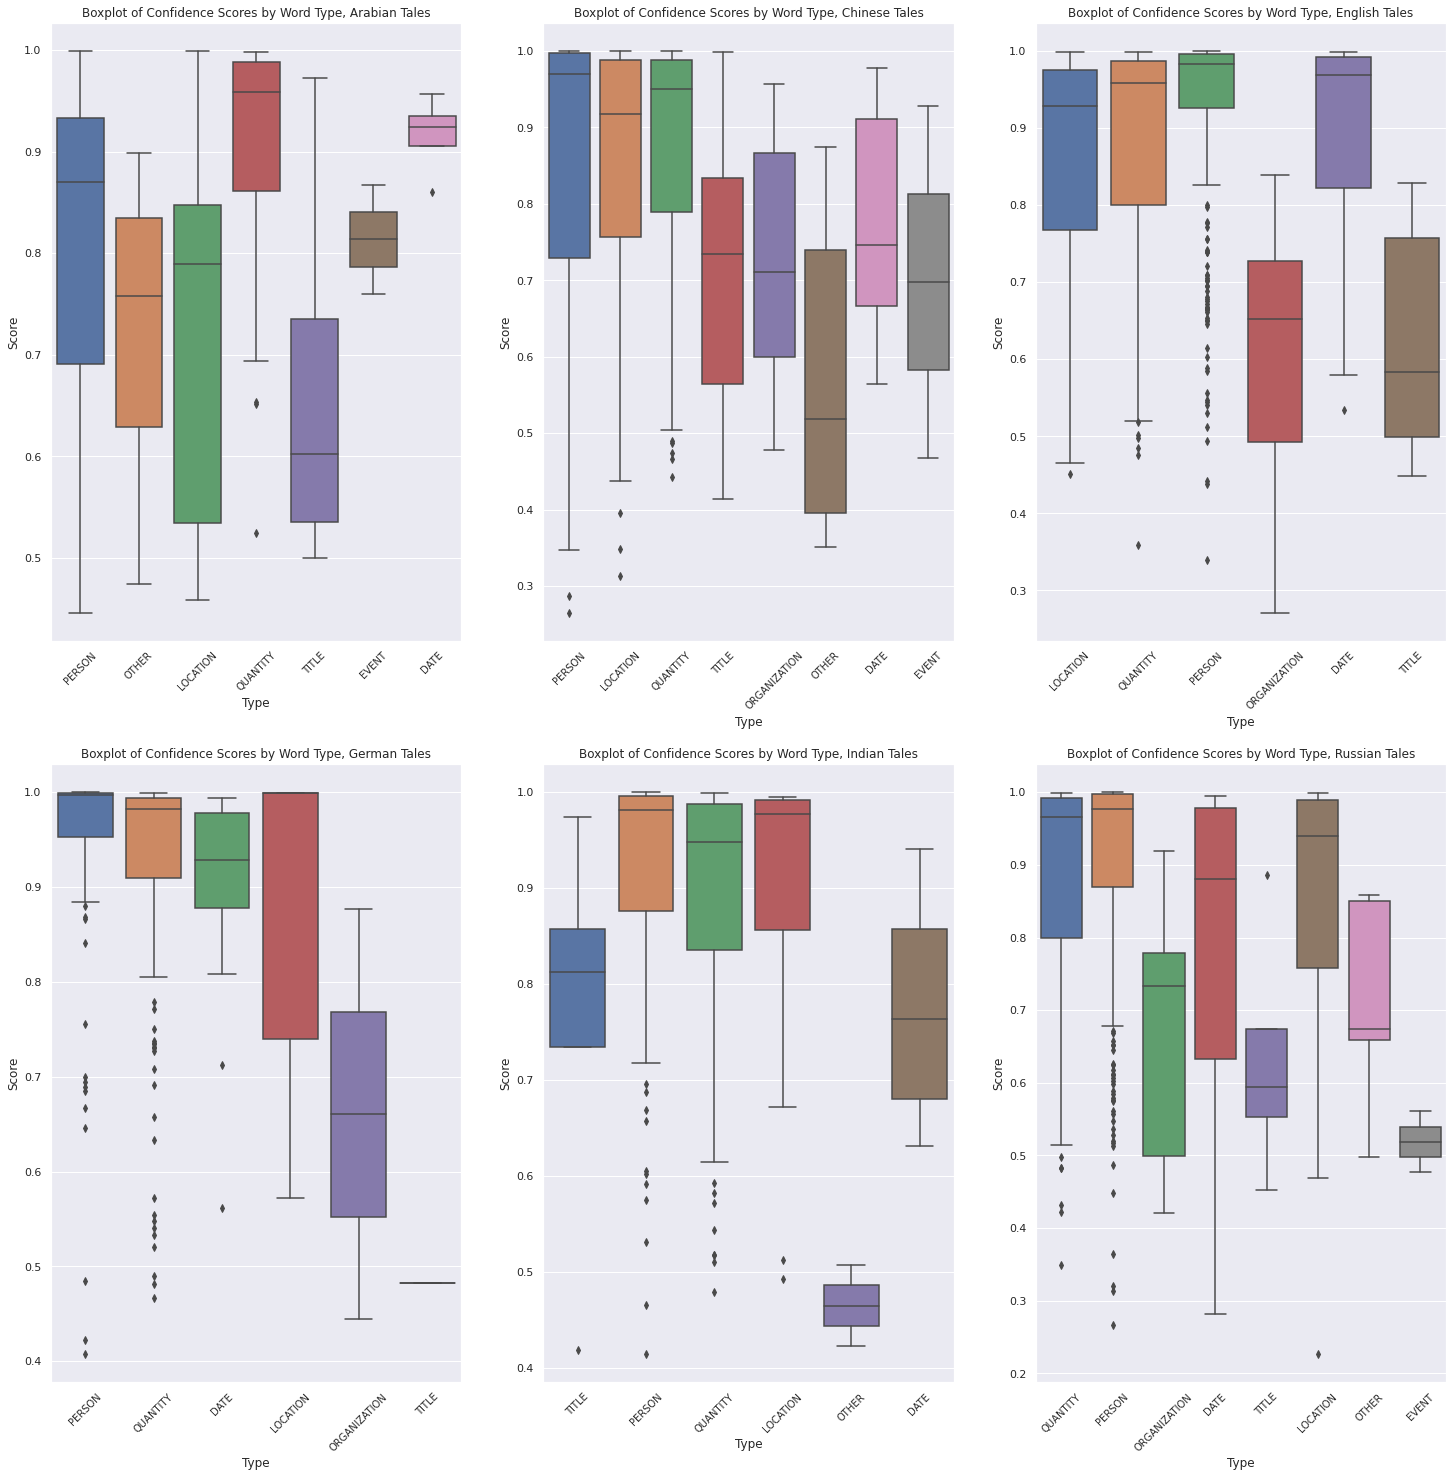

In [ ]:
fig, axes = plt.subplots(2, 3)
sns.set(rc = {'figure.figsize':(25, 25)})

arabian_boxplot=sns.boxplot(x="Type", y="Score", data=arabian_text, orient='v', ax=axes[0,0])
arabian_boxplot.set(title='Boxplot of Confidence Scores by Word Type, Arabian Tales')
arabian_boxplot.set_xticklabels(arabian_boxplot.get_xticklabels(),rotation=45,size=10)

chinese_boxplot=sns.boxplot(x="Type", y="Score", data=chinese_text, orient='v', ax=axes[0,1])
chinese_boxplot.set(title='Boxplot of Confidence Scores by Word Type, Chinese Tales')
chinese_boxplot.set_xticklabels(chinese_boxplot.get_xticklabels(),rotation=45,size=10)

english_boxplot=sns.boxplot(x="Type", y="Score", data=english_text,orient='v', ax=axes[0,2])
english_boxplot.set(title='Boxplot of Confidence Scores by Word Type, English Tales')
english_boxplot.set_xticklabels(english_boxplot.get_xticklabels(),rotation=45,size=10)

german_boxplot=sns.boxplot(x="Type", y="Score", data=german_text,orient='v', ax=axes[1,0])
german_boxplot.set(title='Boxplot of Confidence Scores by Word Type, German Tales')
german_boxplot.set_xticklabels(german_boxplot.get_xticklabels(),rotation=45,size=10)

indian_boxplot=sns.boxplot(x="Type", y="Score", data=indian_text,orient='v', ax=axes[1,1])
indian_boxplot.set(title='Boxplot of Confidence Scores by Word Type, Indian Tales')
indian_boxplot.set_xticklabels(indian_boxplot.get_xticklabels(),rotation=45,size=10)

russian_boxplot=sns.boxplot(x="Type", y="Score", data=russian_text, orient='v', ax=axes[1,2])
russian_boxplot.set(title='Boxplot of Confidence Scores by Word Type, Russian Tales')
russian_boxplot.set_xticklabels(russian_boxplot.get_xticklabels(),rotation=45,size=10)

plt.show()

We also create a larger DataFrame for names from the entire analysis. With this, we can search for a significant difference between confidence scores using a binary variable tagging English names.

In [ ]:
english_text['west'] = 1
arabian_text['west'] = 0
chinese_text['west'] = 0
german_text['west'] = 0
indian_text['west'] = 0
russian_text['west'] = 0

frames = [english_text, arabian_text, chinese_text, german_text, indian_text, russian_text]
result = pd.concat(frames)
result = result[(result['Type'] == 'PERSON')]
display(result)

,Unnamed: 0,Score,Type,Text,BeginOffset,EndOffset,west
3,3,0.546611,PERSON,Sir,118,121,1
4,4,0.962815,PERSON,William,122,129,1
5,5,0.797503,PERSON,Sir,415,418,1
6,6,0.987791,PERSON,William,419,426,1
12,12,0.955468,PERSON,William,1341,1348,1
...,...,...,...,...,...,...,...
627,627,0.980908,PERSON,Vazúza,717,723,0
628,628,0.961843,PERSON,Vólga,795,800,0
630,630,0.980453,PERSON,Vazúza,875,881,0
631,631,0.989312,PERSON,Vólga,916,921,0


In [ ]:
res1 = linregress(result['west'], result['Score'])
res1._asdict()

OrderedDict([('slope', 0.034411834908850525),
             ('intercept', 0.8916425824621834),
             ('rvalue', 0.10298408449116801),
             ('pvalue', 0.0002697855118905083),
             ('stderr', 0.009419714491998951)])

Based on the above output, for a Western name, the confidence score increases by roughly 0.0344 points, or 3.4 person. This estimate is significant at above the 99% level, with a p-value of below 1% . So, there is strong evidence to indicate that a significant difference in confidence scores exists. Plotting our results:

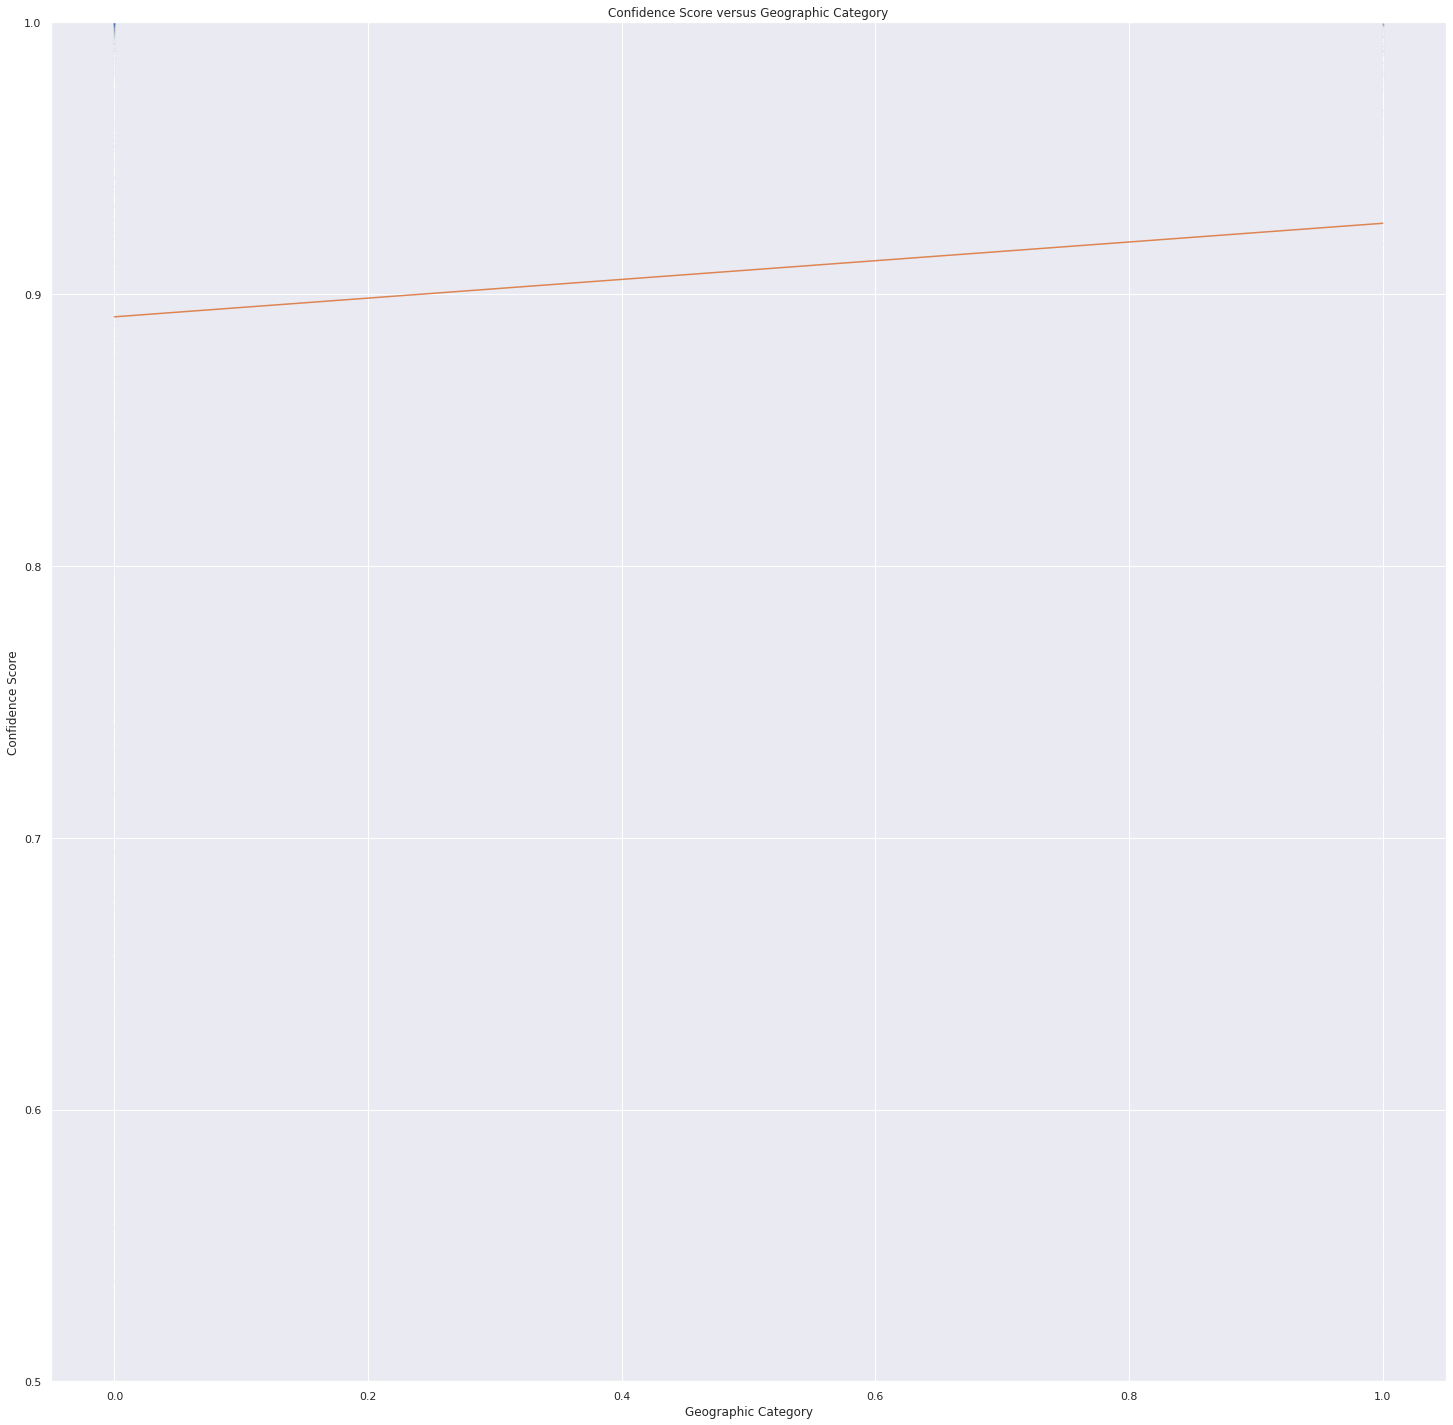

In [ ]:
plt.plot(result['west'], result['Score'], 'o', 
         alpha=0.01, markersize=1)
sns.set(rc = {'figure.figsize':(10, 8)})
fx = np.array([0, 1])
fy = res1.intercept + res1.slope * fx
plt.plot(fx, fy, '-')

plt.ylim([0.5, 1.0
    ])
plt.xlabel('Geographic Category')
plt.ylabel('Confidence Score')
plt.title('Confidence Score versus Geographic Category');